# 1 Exercises for Pandas, APIs and Plotting

## 1. Coding workflow

According to Gentzkow and Shapiro, version control is a necessity because it ensures: 
    - replicability: can replicate any intermediate results
    - efficiency: saving time, quickly revert changes 
    - facilitates comparison between versions, can track them easiy
    - traceability of all changes made: what & by who
    - warnings for simultaneous and conflicting changes

## 2. Occupations

In [46]:
# Import dataset
import pandas as pd
OCCUPATIONS = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
df = pd.read_csv(OCCUPATIONS, sep='|')

In [47]:
# Set user as index
df = df.set_index("user_id")
df.index.names = ["User"]

In [ ]:
# 

In [39]:
# Type of each column
df.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [52]:
# Occupations
df["occupation"].nunique() # number of occupations is 21
df["occupation"].value_counts() # most frequent occupation is student

21

In [54]:
# Age
df["age"].value_counts() # least frequent ages are 7,10,11,66,73 

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

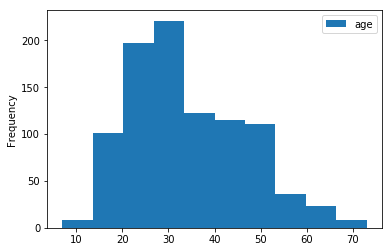

In [66]:
# Histogram for occupations
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df.plot.hist("occupation")

plt.savefig('occupations.pdf')

## 3. Countries’ alcoholic consumption

## 4. Tips

In [74]:
# Load dataset
import seaborn as sns
TIPS = sns.load_dataset("tips")

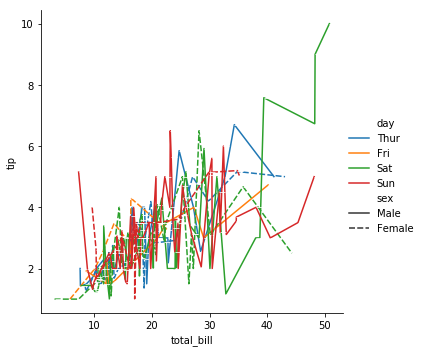

In [96]:
# Plotting
sns.relplot(x='total_bill', y='tip', data=TIPS, kind="line", hue="day", style="sex", marker=True)
plt.savefig('tips.pdf') # saving the plot

## 7. Memory

In [40]:
# Load data

import pandas as pd
DATA = "https://query.data.world/s/wsjbxdqhw6z6izgdxijv5p2lfqh7gx"
df = pd.read_csv(DATA)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
# Inspect data

df.info()
df.info(memory_usage="deep")
# second info shows much larger memory usage 
# default: memory estimation based in column dtype and number of 
    # rows assuming values consume the same memory amount for 
    # corresponding dtypes. 
# deep: real memory usage calculation is performed, 
    # cost of computational resources
# Memory space required: 861.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 211.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 861.6 MB


In [42]:
# Copy of data with only object columns remaining 

df_obj = df.select_dtypes(include=['object'])
df_obj.head()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
0,Thu,CL1,na,FW1,na,D,NaN,NaN,NaN,FOR01,...,caret101,Tom Carey,mince101,Ed Mincher,mcdej101,James McDermott,kellb105,Bill Kelly,NaN,Y
1,Fri,BS1,na,WS3,na,D,NaN,NaN,NaN,WAS01,...,leona101,Andy Leonard,braia102,Asa Brainard,burrh101,Henry Burroughs,berth101,Henry Berthrong,HTBF,Y
2,Sat,CL1,na,RC1,na,D,NaN,NaN,NaN,RCK01,...,ansoc101,Cap Anson,sagep101,Pony Sager,birdg101,George Bird,stirg101,Gat Stires,NaN,Y
3,Mon,CL1,na,CH1,na,D,NaN,NaN,NaN,CHI01,...,folet101,Tom Foley,duffe101,Ed Duffy,pinke101,Ed Pinkham,zettg101,George Zettlein,NaN,Y
4,Tue,BS1,na,TRO,na,D,NaN,NaN,NaN,TRO01,...,beave101,Edward Beavens,bells101,Steve Bellan,pikel101,Lip Pike,cravb101,Bill Craver,HTBF,Y


In [43]:
# Description of new dataframe

df_obj.describe()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
count,171907,171907,171907,171907,171907,140150,116,145,180,171907,...,140838,140838,140838,140838,140838,140838,140838,140838,1456,140841
unique,7,148,7,148,7,2,116,3,5,245,...,4774,4720,5253,5197,4760,4710,5193,5142,332,1
top,Sat,CHN,NL,CHN,NL,D,"19600622,,5,7,48",H,V,STL07,...,grimc101,Charlie Grimm,grimc101,Charlie Grimm,lopea102,Al Lopez,spahw101,Warren Spahn,HTBF,Y
freq,28891,8870,88866,9024,88867,82724,1,69,90,7022,...,427,427,491,491,676,676,339,339,1112,140841


In [45]:
# get the list of column names

# define few unique as less than 5% of observations

columns_few = []
for col in df_obj.columns:
    if df_obj[col].nunique()/df_obj[col].count() <= 0.05:
        columns_few.append(col)
columns_few

['day_of_week',
 'v_name',
 'v_league',
 'h_name',
 'h_league',
 'day_night',
 'forefeit',
 'protest',
 'park_id',
 'hp_umpire_id',
 'hp_umpire_name',
 '1b_umpire_id',
 '1b_umpire_name',
 '2b_umpire_id',
 '2b_umpire_name',
 '3b_umpire_id',
 '3b_umpire_name',
 'lf_umpire_name',
 'rf_umpire_name',
 'v_manager_id',
 'v_manager_name',
 'h_manager_id',
 'h_manager_name',
 'winning_pitcher_id',
 'winning_pitcher_name',
 'losing_pitcher_id',
 'losing_pitcher_name',
 'saving_pitcher_name',
 'winning_rbi_batter_id_name',
 'v_starting_pitcher_id',
 'v_starting_pitcher_name',
 'h_starting_pitcher_id',
 'h_starting_pitcher_name',
 'v_player_1_id',
 'v_player_1_name',
 'v_player_2_id',
 'v_player_2_name',
 'v_player_3_id',
 'v_player_3_name',
 'v_player_4_id',
 'v_player_4_name',
 'v_player_5_id',
 'v_player_5_name',
 'v_player_6_id',
 'v_player_6_name',
 'v_player_7_id',
 'v_player_7_name',
 'v_player_8_id',
 'v_player_8_name',
 'v_player_9_id',
 'v_player_9_name',
 'h_player_1_id',
 'h_player_1_n

In [28]:
type(columns_few)

list

In [ ]:
# Convert object column into category column?

# only makes sense when the feature takes on very few unique values, 
    # in that case it saves memory significantly
# if >50% of values are unique, category is not unseful. 

In [48]:
# Convert to category columns

# own criterion: if <10 unique values
for i in range(len(columns_few)):
    df_obj[columns_few[i]] = df_obj[columns_few[i]].astype('category')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
# New memory size

df_obj.info(memory_usage="deep")
# memory usage: 97.3 MB -> significant reduction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 78 columns):
day_of_week                   171907 non-null category
v_name                        171907 non-null category
v_league                      171907 non-null category
h_name                        171907 non-null category
h_league                      171907 non-null category
day_night                     140150 non-null category
completion                    116 non-null object
forefeit                      145 non-null category
protest                       180 non-null category
park_id                       171907 non-null category
v_line_score                  147271 non-null object
h_line_score                  147271 non-null object
hp_umpire_id                  171888 non-null category
hp_umpire_name                171891 non-null category
1b_umpire_id                  147040 non-null category
1b_umpire_name                171891 non-null category
2b_umpire_id            

In [ ]:
# Speed up routine

# use dtype when reading the csv, change type to category